## Ejercicio 7.19
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_7.19.png)

In [1]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter

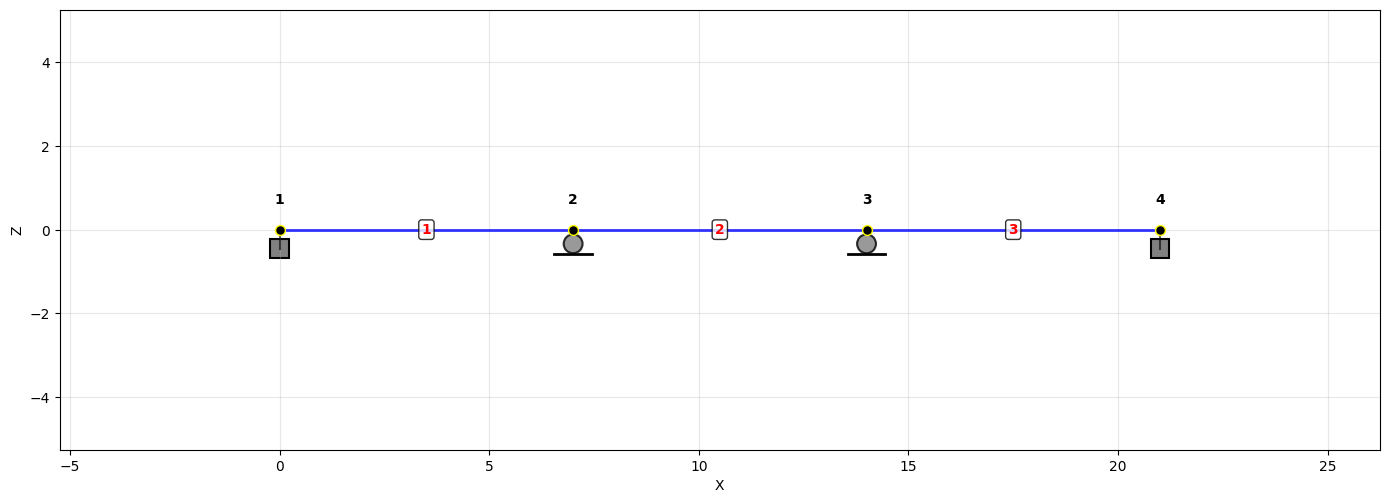

In [2]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 1
I = 145 *10**-6

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(2, x=7, z=0)
system.defineNode(3, x=7*2, z=0)
system.defineNode(4, x=7*3, z=0)

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(4, ux=True, uz=True, ry=True)
system.assignJoint.restrictions(2, ux=False, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=False, uz=True, ry=False)

# Definición de Elementos (Conectividad)
system.defineElement(1, 1, 2, A=A, E=E, I=I)
system.defineElement(2, 2, 3, A=A, E=E, I=I)
system.defineElement(3, 3, 4, A=A, E=E, I=I)

# Asignación de Cargas
system.assignJoint.displacement(2, ux=0, uz=-8/1000, ry=0)
system.assignJoint.displacement(3, ux=0, uz=-30/1000, ry=0)

# Visualización Inicial
plotter.showFrame()

In [3]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=True)


--------------------------------------------------------------------------------
 1. INFORMACIÓN GENERAL
--------------------------------------------------------------------------------
Número de nodos: 4
Número de elementos: 3
Grados de libertad totales: 12
Grados de libertad restringidos (desplazamientos conocidos): 8 de 12
GL restringidos: [ 0  1  2  4  7  9 10 11]
Grados de libertad libres (fuerzas conocidas): 4 de 12
GL libres: [3 5 6 8]

--------------------------------------------------------------------------------
 2. MATRICES PARTICIONADAS
--------------------------------------------------------------------------------
KAA (4x4):
  |         3 |          5 |          6 |          8 |

  |   57142857 |          0 |  -28571429 |          0 |
  |          0 |      33143 |          0 |       8286 |
  |  -28571429 |          0 |   57142857 |          0 |
  |          0 |       8286 |          0 |      33143 |
 
KAB (4x8):
  |         0 |          1 |          2 |          4 |    

In [4]:
# Obtención de Resultados Detallados de Elementos
system.getInfoElements()

ELEMENTO 1: [1, 2]  - Tipo 0
PROPIEDADES
  Longitud: 7.000
  Área (A): 1.0000e+00
  Módulo elástico (E): 2.0000e+08
  Momento de inercia (I): 1.4500e-04
  Liberaciones:  Nodo i = NO | Nodo j = NO
  Orientación: C=1.000 | S=0.000

CARGAS APLICADAS:
  No hay cargas aplicadas

MATRIZ DE TRANSFORMACIÓN T (6x6):
  |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |     -0.000 |      1.000 |      0.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      1.000 |      0.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |     -0.000 |      1.000 |      0.000 |
  |      0.000 |      0.000 |      0.000 |      0.000 |      0.000 |      1.000 |

MATRIZ DE RIGIDEZ LOCAL K (6x6):
  | 28571428.571 |      0.000 |      0.000 | -28571428.571 |      0.000 |      0.000 |
  |      0.000 |   1014.577 |   3551.020 |      0.000 |  -1014.577 |   3551.02

In [5]:
system.getInfoNodes()

Node 1: (0, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=-4.870, My=-1.894

Node 2: (7, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=-8.0000e-03, Ry=-3.6571e-03
  Fuerzas: Fx=0.000, Fz=20.494, My=0.000

Node 3: (14, 0) - Móvil en X
  Desplazamientos: Ux=0.0000e+00, Uz=-3.0000e-02, Ry=1.7714e-03
  Fuerzas: Fx=0.000, Fz=-39.771, My=0.000

Node 4: (21, 0) - Empotrado
  Desplazamientos: Ux=0.0000e+00, Uz=0.0000e+00, Ry=0.0000e+00
  Fuerzas: Fx=0.000, Fz=24.147, My=-91.853


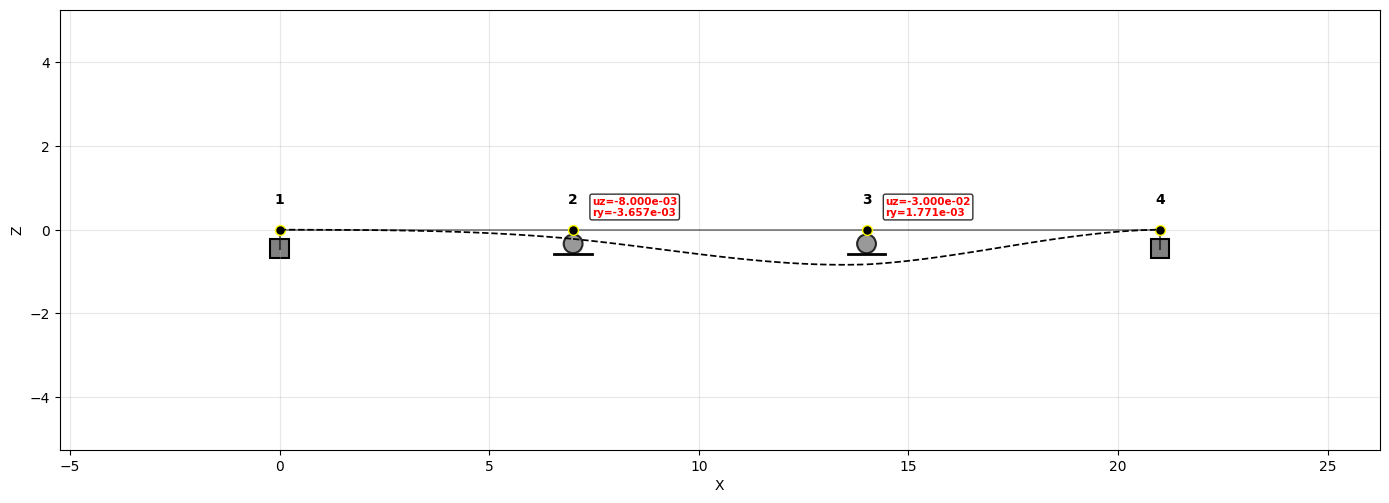

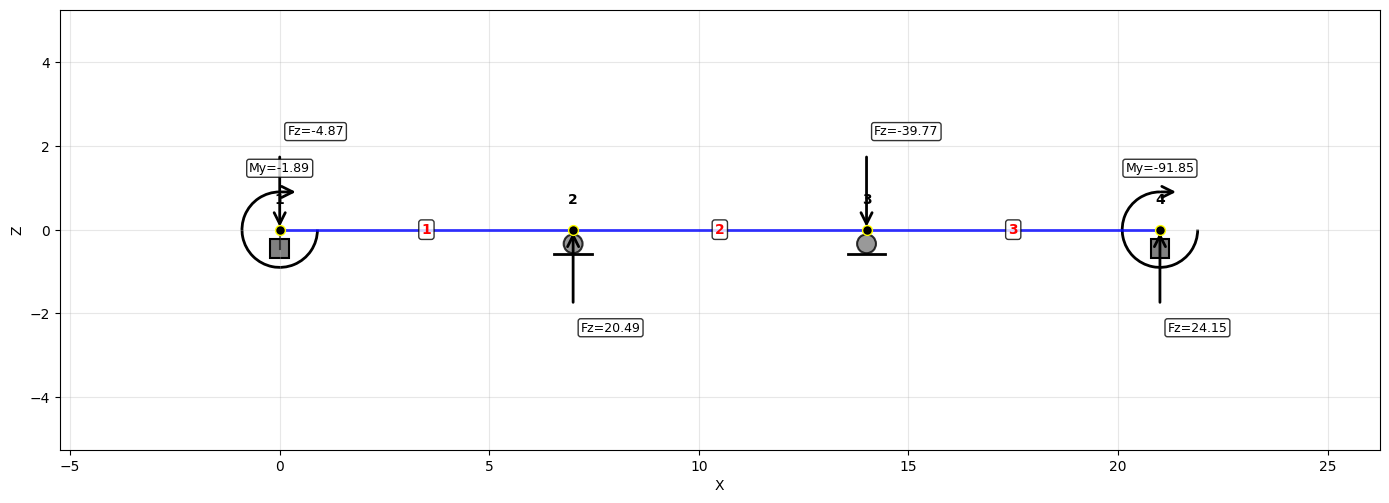

In [6]:
# Visualización de Resultados
plotter.showDeformedShape(escala=0.05)
plotter.showReactions()